# AI-Ready Data Comparison

This document provides an analysis comparing the **AI-ready dataset** with the **raw dataset** as part of the data preparation process for the buoy motion prediction project. The purpose of this comparison is to highlight the improvements made to the dataset through cleaning, preprocessing, and feature engineering, ensuring it is optimized for machine learning workflows.

## Key Improvements in the AI-Ready Dataset

1. **Missing Data Handling**:
   - Placeholder values (e.g., `-999`) were removed or imputed, resulting in a cleaner dataset with fewer missing values.
   - This reduces noise and improves model performance.

2. **Geographic Focus**:
   - The dataset was filtered to include only Arctic regions, as indicated by the narrower distributions of `Latitude` and `Longitude`.

3. **Feature Engineering**:
   - New features such as `wind_magnitude` and `wind_angle` were derived from wind components, adding predictive power.
   - Raw wind components (`era5_uwnd`, `era5_vwnd`) were cleaned to remove outliers.

4. **Correlation and Interpretability**:
   - Correlations among features in the AI-ready dataset better reflect physical relationships, ensuring that machine learning models are trained on meaningful data.


## Visualizations
The following plots illustrate the differences between the raw and AI-ready datasets:
1. **Boxplots**: Highlight outlier reduction and narrowed variability in key features.
2. **Correlation Heatmaps**: Show improved feature relationships in the AI-ready data.
3. **Feature Distributions**: Demonstrate the impact of filtering and cleaning on the dataset's usability.


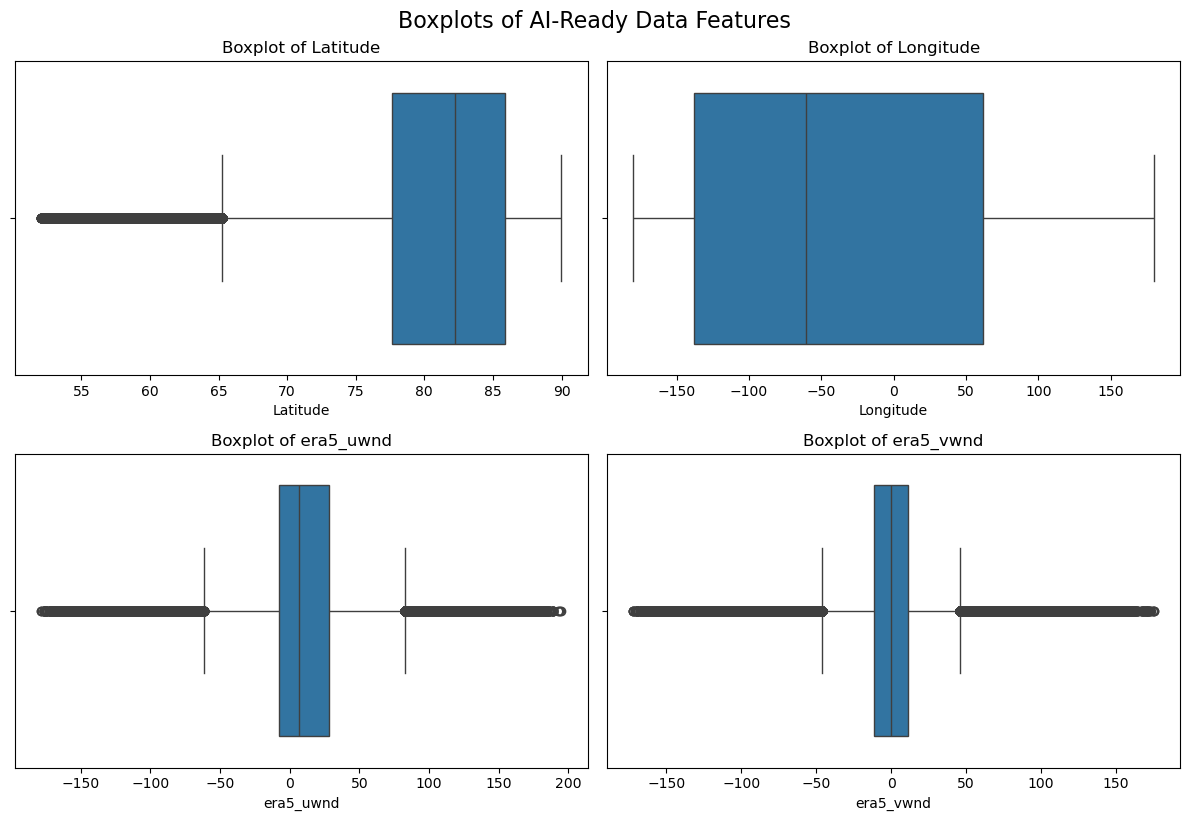

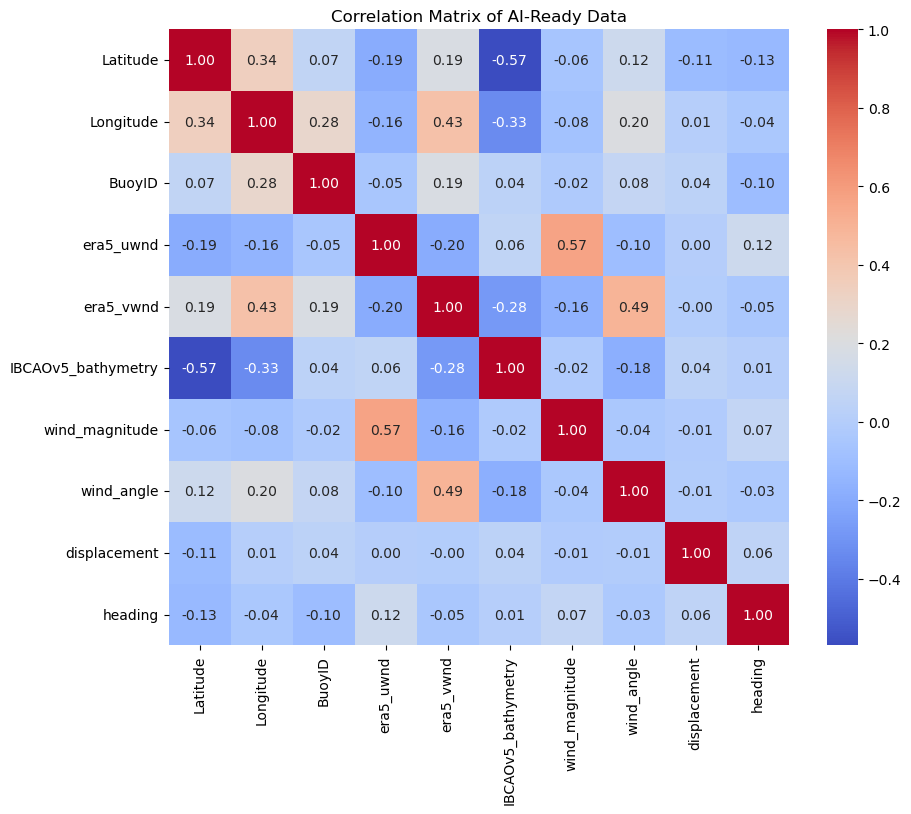

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load AI-ready dataset
ai_ready_data = pd.read_csv('combined_buoy_data.csv')

# Define features to visualize
features = ['Latitude', 'Longitude', 'era5_uwnd', 'era5_vwnd'] 

# Create a single figure with subplots for all features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(data=ai_ready_data, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()  # Adjust layout to avoid overlap

plt.suptitle("Boxplots of AI-Ready Data Features", y=1.02, fontsize=16)  
plt.show()

# Select only numeric columns for correlation matrix
numeric_data = ai_ready_data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of AI-Ready Data')
plt.show()


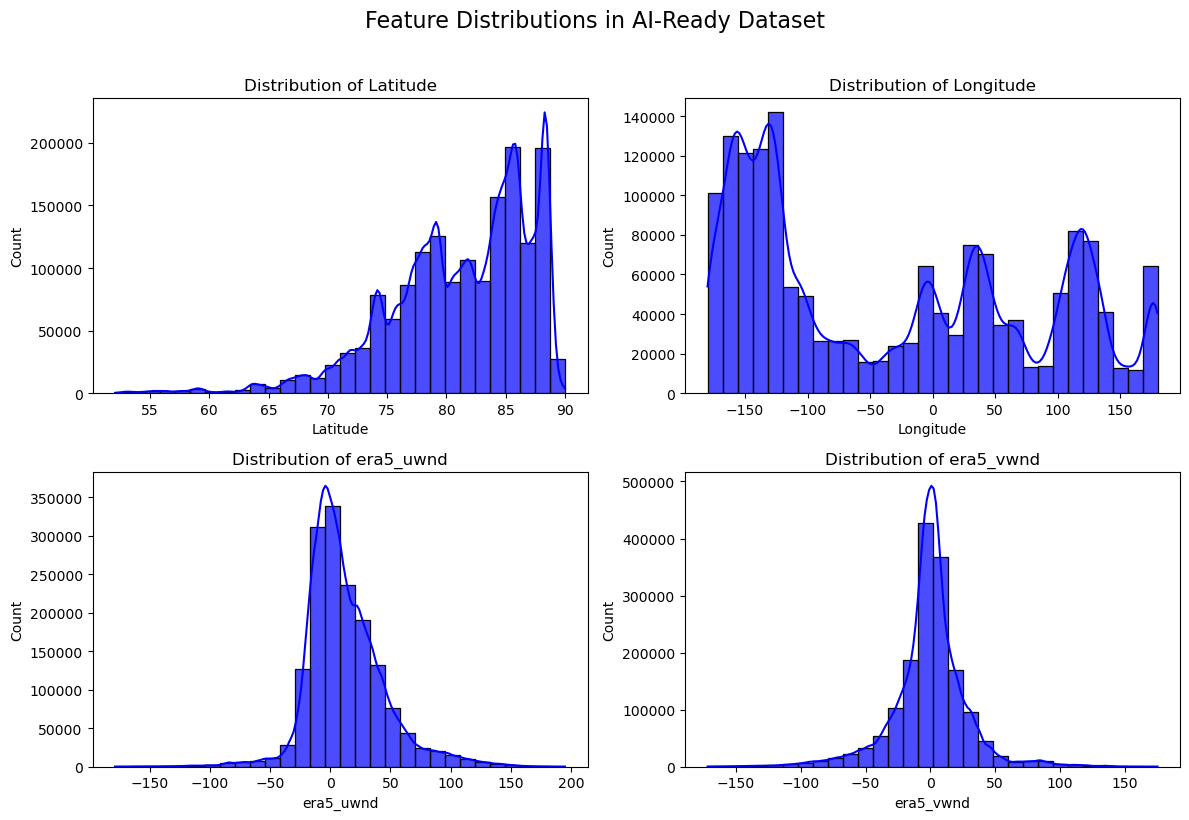

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to visualize
features = ['Latitude', 'Longitude', 'era5_uwnd', 'era5_vwnd']  

# Create distribution plots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(data=ai_ready_data, x=feature, kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.suptitle("Feature Distributions in AI-Ready Dataset", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


## Conclusion
The preprocessing steps applied to create the AI-ready dataset have significantly improved its quality and focus. These enhancements ensure that the data is optimized for machine learning workflows, particularly for the prediction of Arctic buoy motion.